# Pandas-Library

Pandas is a Python library for data analysis and manipulation, most notably table-formatted data.

Since pandas is an additional library, it needs to be imported first.

In [1]:
import pandas as pd # Canonical import of pandas as np

Pandas supports two major data structures:

- DataFrames: rectangular data tables
- Series: serial data

## Series

Series are one-dimensional (array-like) data structures, useful for single data columns.



In [2]:
# Create a series from a list, with standard index
s = pd.Series(data = [0,1,4,9,16])
# Display
s.head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

## DataFrames

DataFrame can be created from lists or matrices and imported from data, e.g. csv-Files.

An example DataFrame looks like:

In [3]:
# Create dataframe from list of lists with explicitly named columns
# Since the command stems from the pandas-library, we have to call pd.DataFrame
df = pd.DataFrame(data = [[1, 2, 3], [4, 5, 6]], columns = ['A', 'B', 'C'])
# Show the top lines (.head()) of dataframe
# Since we apply .head() to the dataframe df, we call df.head()
df.head()

,A,B,C
0,1,2,3
1,4,5,6


More frequently, we will import datasets from various sources, in the following command we read the list of all stations in Germany in CSV-format (.read_csv() from Pandas):

In [4]:
df = pd.read_csv(
    'http://download-data.deutschebahn.com/static/datasets/haltestellen/D_Bahnhof_2017_09.csv',
    sep = ';', # Separator default is ","
    decimal=",") # German decimal separator

It is a good idea to initially look at the import in order to know the structure, i.e. column names and data fields. This is where ```df.head()```comes in handy:

In [5]:
df.head()

,EVA_NR,DS100,IFOPT,NAME,VERKEHR,LAENGE,BREITE,STATUS
0,8000001,KA,de:05334:1008,Aachen Hbf,FV,6.091499,50.767800,NaN
1,8000002,TA,de:08136:1000,Aalen Hbf,FV,10.096271,48.841013,NaN
2,8000004,HA,de:05774:7131,Altenbeken,FV,8.943319,51.766433,NaN
3,8000007,FALZ,de:07331:55,Alzey,RV,8.109749,49.750200,NaN
4,8000009,NAN,de:09561:11000,Ansbach,FV,10.578239,49.298032,NaN


The pandas syntax allows for very efficient filtering of the data. In order to access only a single column, we can use ```df[column_name]``` where ```column_name```is one of the above columns:

In [6]:
df['NAME'].head()

0    Aachen Hbf
1     Aalen Hbf
2    Altenbeken
3         Alzey
4       Ansbach
Name: NAME, dtype: object

To quickly learn about the data set at hand, we can use inbuilt functions:

- ```df.describe()``` - mostly for numerical data
- ```df.info()``` to provide information on columns and data types

In [7]:
df.describe()

,EVA_NR,LAENGE,BREITE
count,6.605000e+03,6605.000000,6605.000000
mean,8.011959e+06,10.118460,50.612732
std,2.077004e+04,2.163707,1.729873
min,8.000001e+06,6.070715,47.411032
25%,8.002458e+06,8.398251,49.209151
50%,8.005264e+06,9.871195,50.703920
75%,8.011545e+06,11.902879,51.730323
max,8.099507e+06,14.979080,54.906839


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6605 entries, 0 to 6604
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EVA_NR   6605 non-null   int64  
 1   DS100    6567 non-null   object 
 2   IFOPT    6562 non-null   object 
 3   NAME     6605 non-null   object 
 4   VERKEHR  6605 non-null   object 
 5   LAENGE   6605 non-null   float64
 6   BREITE   6605 non-null   float64
 7   STATUS   111 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 412.9+ KB


## Exercise

Display the **DS100** column of the dataset only. 

It also possible to filter for certain content, e.g. to find the names of all long distance stations (showing 'FV' in the 'VERKEHR'-column):

In [9]:
df['VERKEHR'] == 'FV'

0        True
1        True
2        True
3       False
4        True
        ...  
6600    False
6601    False
6602    False
6603    False
6604    False
Name: VERKEHR, Length: 6605, dtype: bool

Luckily, pandas DataFrames accept this list of True/False as argument to restrict the returned values:

In [10]:
df[df['VERKEHR'] == 'FV'].head()

,EVA_NR,DS100,IFOPT,NAME,VERKEHR,LAENGE,BREITE,STATUS
0,8000001,KA,de:05334:1008,Aachen Hbf,FV,6.091499,50.767800,NaN
1,8000002,TA,de:08136:1000,Aalen Hbf,FV,10.096271,48.841013,NaN
2,8000004,HA,de:05774:7131,Altenbeken,FV,8.943319,51.766433,NaN
4,8000009,NAN,de:09561:11000,Ansbach,FV,10.578239,49.298032,NaN
5,8000010,NAH,de:09661:99082,Aschaffenburg Hbf,FV,9.143697,49.980557,NaN


By adding a second argument in square brackets, we can return only the columns we are interested in:

In [11]:
df[df['VERKEHR'] == 'FV']['DS100'].head()

0     KA
1     TA
2     HA
4    NAN
5    NAH
Name: DS100, dtype: object

This can be used in many ways, e.g. to count how many long distance stations there are in Germany?

In [12]:
df[df['VERKEHR'] == 'FV']['NAME'].count() #It suffices to count one colum only...

348

By concatenating multiple commands, we can list all stations with Berlin in their name.

In [13]:
df[df['NAME'].str.contains('Berlin')]['NAME'].head(10) 
# Notice we can have more lines displayed

697            Hamburg Berliner Tor
4370              Berlin-Karlshorst
4371             Berlin-Lichtenberg
4373             Berlin-Schöneweide
4425    Berlin-Schönefeld Flughafen
4541              Berlin Ostbahnhof
4657          Berlin-Charlottenburg
4658                 Berlin-Spandau
4659                 Berlin Wannsee
4660     Berlin Zoologischer Garten
Name: NAME, dtype: object

Name, Latitude and Longitude of 'Berlin' Stations - most of them are actually in Berlin...

In [14]:
# Filter and save returned dataframe in new variable:
df2 = df[df['NAME'].str.contains('Berlin')][['NAME', 'LAENGE', 'BREITE']]
# Display the first few lines:
df2.head()

,NAME,LAENGE,BREITE
697,Hamburg Berliner Tor,10.024630,53.552870
4370,Berlin-Karlshorst,13.526813,52.480681
4371,Berlin-Lichtenberg,13.496923,52.509896
4373,Berlin-Schöneweide,13.509395,52.455127
4425,Berlin-Schönefeld Flughafen,13.512710,52.391062


We can use the ```sort_values```to find southernmost 'Berlin' station. Here, ```inplace``` means that we manipulate the variable in memory. While this is not critical for smaller data sets, Pandas is generally open for Terabytes where the additional memory would hurt.

In [15]:
df2.sort_values('BREITE', inplace = True, ascending = True)
df2.head()

,NAME,LAENGE,BREITE
6434,Berlin-Lichtenrade,13.396175,52.387297
4425,Berlin-Schönefeld Flughafen,13.512710,52.391062
6405,Berlin Schichauweg,13.389303,52.398837
6384,Berlin Grünbergallee,13.542485,52.399411
6420,Berlin-Altglienicke,13.558753,52.407299


It is possible to export the resulting data frames, e.g. to JSON (```df2.to_json('filename.json')```) or to Excel.

In [16]:
df2.to_excel('BerlinStations.xlsx')

Alternatively, we can read data from AWS cloud storage (S3) - in this case we use test data of our railway challenge locomotive *Emma*.

The dataset contains:

- $x$: Longitude
- $y$: Latitude
- $z$: Altitude (m above sea level)
- $v$: velocity (m/s)

All data recorded in $1$ Hz frequency using an iPad-GPS.

In [17]:
df = pd.read_json('https://s3-eu-west-1.amazonaws.com/ifvworkshopdata/emma1000.json')

In [18]:
df.head()

,y,x,z,v
0,47.992597,9.678717,557.519958,-1.0
1,47.992597,9.678717,557.519958,-1.0
2,47.992538,9.678639,561.268433,0.0
3,47.992538,9.678639,561.268433,0.0
4,47.992538,9.678639,562.678432,0.0


By using the ```plot()```-function, we can obtain a rough estimate of the velocity distribution.

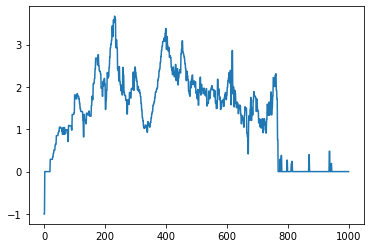

In [19]:
df['v'].plot()

Apparently, the GPS has $v = -1$-readings as long as it is acquiring a position. We filter these out:

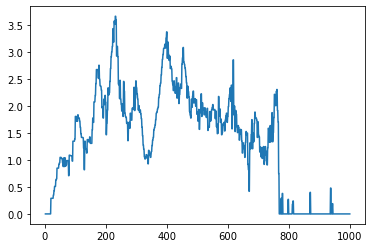

In [20]:
df[df['v'] >= 0]['v'].plot()

## Exercise:

1. Load the open data set on platform height and length from: http://download-data.deutschebahn.com/static/datasets/bahnsteig/DBSuS-Bahnsteigdaten-Stand2020-03.csv
1. Inspect the dataset
1. Find the longest (```df[column_name].max()```) and shortest() (```df[column_name].min()```) platform length ('Netto-baulänge (m)')
1. Find the associated station number ('Bahnhofsnummer')

Extra task: obtain the name by integrating with http://download-data.deutschebahn.com/static/datasets/stationsdaten/DBSuS-Uebersicht_Bahnhoefe-Stand2020-03.csv!

Hint: use ```list()``` to obtain return values and access the $0$-th element to obtain a numeric value.